In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import seaborn as sns
import matplotlib.ticker as mt
import matplotlib.dates as mdates
import datetime as dt

def readabledate (unixtime):    
    return dt.datetime.fromtimestamp(float(unixtime))

df = pd.read_csv('cm.csv')
print(df.columns,"\n")
print(df.info(),"\n")

print(df.describe())

Index(['slug', 'symbol', 'name', 'date', 'ranknow', 'open', 'high', 'low',
       'close', 'volume', 'market', 'close_ratio', 'spread'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942297 entries, 0 to 942296
Data columns (total 13 columns):
slug           942297 non-null object
symbol         942297 non-null object
name           942297 non-null object
date           942297 non-null object
ranknow        942297 non-null int64
open           942297 non-null float64
high           942297 non-null float64
low            942297 non-null float64
close          942297 non-null float64
volume         942297 non-null float64
market         942297 non-null float64
close_ratio    942297 non-null float64
spread         942297 non-null float64
dtypes: float64(8), int64(1), object(4)
memory usage: 93.5+ MB
None 

             ranknow          open          high           low         close  \
count  942297.000000  9.422970e+05  9.422970e+05  9.422970e+05  9.422970e+05 

In [3]:
name = df.name.unique()
print(name)

['Bitcoin' 'XRP' 'Ethereum' ... '42-coin' 'Bit20' 'Project-X']


In [31]:
#btc = df[df['name']=='Bitcoin']
#btc.drop(['slug','symbol','name','market','volume','close_ratio','spread'],axis=1,inplace=True)
#btc.head()

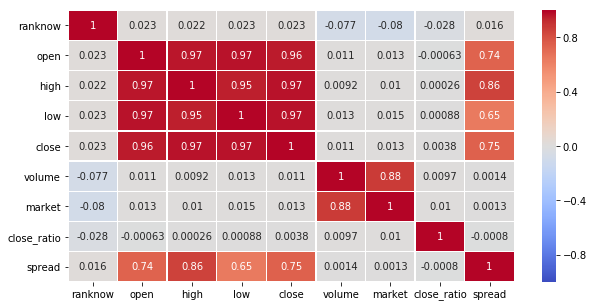

In [4]:
corr = df.corr()

# Sets the graph dimensions
plt.figure(figsize=(10,5))

"""
Creates the seaborn heatmap using the correlation list calculated from the dataframe above.

Optional attributes:

annot: (Boolean) shows the correlation values for each pair if set to True.
vmin/vmax: (Float) set the colorbar min and max values (default is drawn from values passed in)
linewidth: (Float) allows you to specify a line width (in pts.) in between cells.
cmap: (String) allows you to change the color map used. Other options below.


Color Palette Resources: 

https://seaborn.pydata.org/tutorial/color_palettes.html
http://seaborn.pydata.org/tutorial/color_palettes.html#qualitative-color-palettes
""" 
hmap = sns.heatmap(corr, annot=True, vmin=-1.0,vmax=1.0, linewidth = 0.5, cmap='coolwarm')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


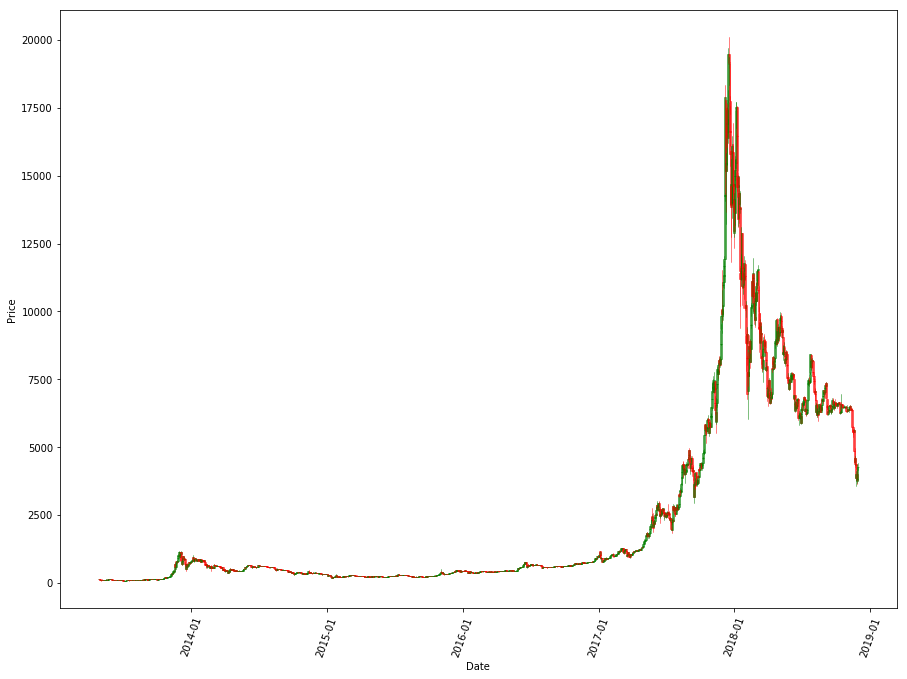

In [8]:
hfmt = mdates.DateFormatter('%Y-%m')
Bitcoin = df[df['ranknow'] == 1]
BitcoinOHLC = Bitcoin[['date','open','high','low','close']]
BitcoinOHLC['date'] = pd.to_datetime(BitcoinOHLC['date'])
BitcoinOHLC['date'] = mdates.date2num(BitcoinOHLC['date'].astype(dt.date))
f,ax=plt.subplots(figsize=(15,11))
ax.xaxis_date()
plt.xlabel("Date")
candlestick_ohlc(ax,BitcoinOHLC.values,width=5, colorup='green', colordown='red',alpha=0.5)
ax.set_xticklabels(ax.get_xticks(),rotation=70)
ax.xaxis.set_major_formatter(hfmt)
plt.ylabel("Price")
#plt.legend()
plt.show()

Text(736689.0, 19000, '.')

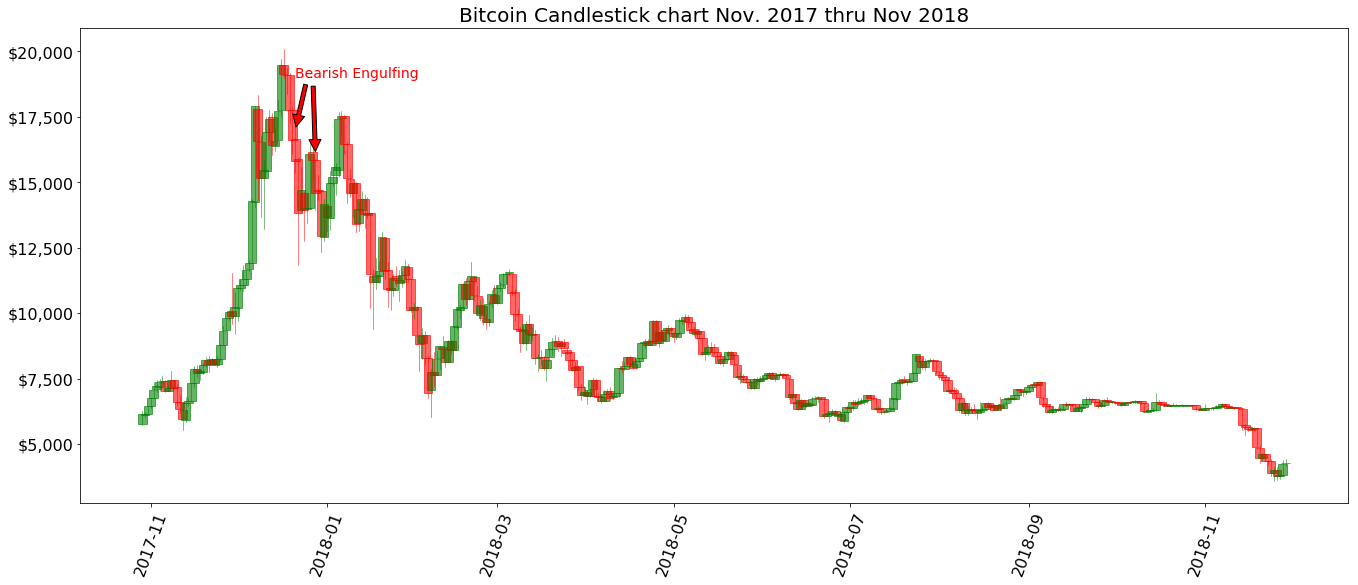

In [9]:
BitcoinOHLC = BitcoinOHLC[BitcoinOHLC['date'] > 736630.0]

fig = plt.figure(figsize=(22,22))
axes2 = fig.add_axes([0.15,0.65,0.8,0.3])


axes2.xaxis_date()
candlestick_ohlc(axes2,BitcoinOHLC.values,width=3, colorup='g', colordown='r',alpha=0.60)
axes2.set_xticklabels(axes2.get_xticks(),rotation=70,fontsize=16)
axes2.set_yticklabels(['${:,.0f}'.format(x) for x in plt.gca().get_yticks()],fontsize=16)
axes2.xaxis.set_major_formatter(hfmt)
axes2.set_title('Bitcoin Candlestick chart Nov. 2017 thru Nov 2018', fontsize=20)
#axes2.scatter(736688.0, 17000,marker="o", color="white", s=50000, linewidths=0)
axes2.annotate('Bearish Engulfing', (736684.0,19000),fontsize=14,rotation=0,color='r')
axes2.annotate('.', xy=(736684.0,17000), xytext=(736688.0, 19000),
            arrowprops=dict(facecolor='Red', shrink=0.06),
            )
axes2.annotate('.', xy=(736691.0,16000), xytext=(736689.0, 19000),
            arrowprops=dict(facecolor='Red', shrink=0.06),
            )


In [6]:
btc['date'] = pd.to_datetime(btc['date'])
btc['date'] = mdates.date2num(btc['date'].astype(dt.date))
print(btc.columns)

NameError: name 'btc' is not defined

No handles with labels found to put in legend.


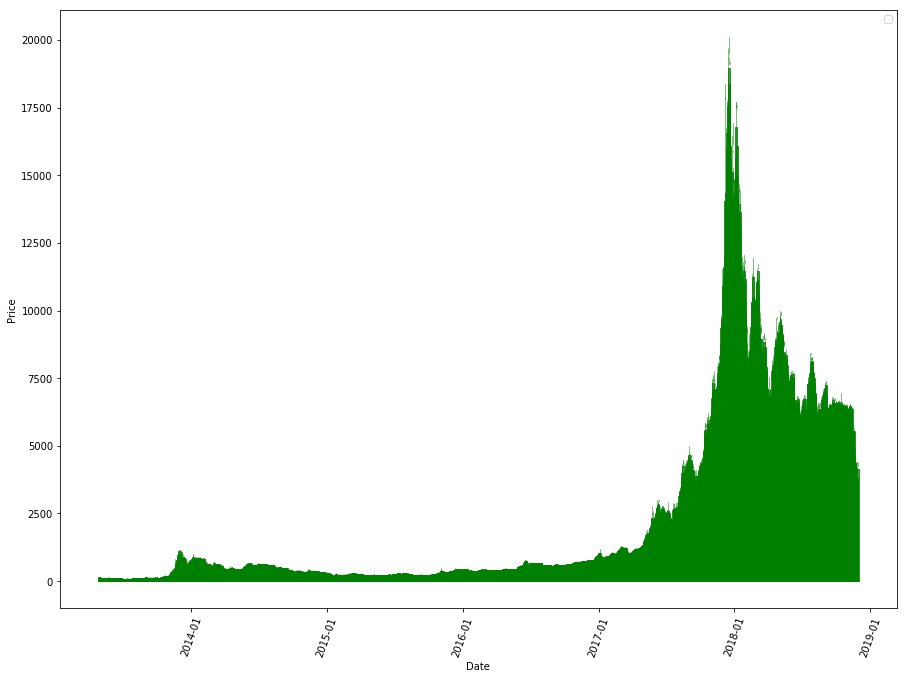

In [36]:
hfmt = mdates.DateFormatter('%Y-%m')
f,ax=plt.subplots(figsize=(15,11))
ax.xaxis_date()
plt.xlabel("Date")
candlestick_ohlc(ax,btc.values,width=5, colorup='g', colordown='r',alpha=0.75)
ax.set_xticklabels(ax.get_xticks(),rotation=70)
ax.xaxis.set_major_formatter(hfmt)
plt.ylabel("Price")
plt.legend()
plt.show()

In [1]:
fig,ax = plt.subplots(figsize=(15,11))
ax.xaxis_date()


candlestick_ohlc(ax,df.values,width=5, colorup='g', colordown='r',alpha=0.75)

NameError: name 'plt' is not defined

In [50]:
#df['Timestamp'] = pd.to_datetime(df['Timestamp'])
#df['Timestamp'] = mdates.date2num(df['Timestamp'].astype(dt.date))

In [49]:

#btc = df[df['Symbol']=='BTC']
#btc['Date'] = pd.to_datetime(btc['Date'])
#btc['Date'] = mdates.date2num(btc['Date'].astype(dt.date))
#df.drop(['Volume_(BTC)','Volume_(Currency)', 'Weighted_Price'],axis=1,inplace=True) 
#df.head()


,Timestamp,Open,High,Low,Close
0,2011-12-31 02:52:00,4.39,4.39,4.39,4.39
1,2011-12-31 02:53:00,4.39,4.39,4.39,4.39
2,2011-12-31 02:54:00,4.39,4.39,4.39,4.39
3,2011-12-31 02:55:00,4.39,4.39,4.39,4.39
4,2011-12-31 02:56:00,4.39,4.39,4.39,4.39
